<a href="https://colab.research.google.com/github/Alejandroe0/Computacional/blob/main/ModeloDeIsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prueba 1

Energía de magnetizacion


In [ ]:
import numpy as np
from numba import njit
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def calcular_energia_magnetizacion(configuracion, J, h):
  """
  Calcula la energía y la magnetización de una configuración del modelo de Ising.

  Args:
    configuracion: Una matriz numpy que representa la configuración del sistema.
                   Los valores son +1 o -1.
    J: La constante de acoplamiento entre los espines.
    h: El campo magnético externo.

  Returns:
    Una tupla (energia, magnetizacion).
  """

  n_filas, n_columnas = configuracion.shape
  energia = 0
  magnetizacion = 0

  for i in range(n_filas):
    for j in range(n_columnas):
      # Interacción con el vecino de la derecha
      if j < n_columnas - 1:
        energia += -J * configuracion[i, j] * configuracion[i, j + 1]

      # Interacción con el vecino de abajo
      if i < n_filas - 1:
        energia += -J * configuracion[i, j] * configuracion[i + 1, j]

      # Interacción con el campo magnético externo
      energia += -h * configuracion[i, j]

      # Suma de la magnetización
      magnetizacion += configuracion[i, j]

  return energia, magnetizacion


# Ejemplo de uso:
configuracion = np.array([
    [1, -1, 1],
    [-1, 1, -1],
    [1, -1, 1]
])

J = 1  # Constante de acoplamiento
h = 0  # Campo magnético externo

energia, magnetizacion = calcular_energia_magnetizacion(configuracion, J, h)

print("Energía:", energia)
print("Magnetización:", magnetizacion)

Energía: 12
Magnetización: 1


# Intento 2, esta vez sin cagarla

In [ ]:

# Definir la función para calcular la energía
def calcular_energia(config, L, J, H):
    energia = 0
    for i in range(L):
        for j in range(L):
            # Energía de interacción con vecinos
            energia -= J * config[i, j] * (config[(i+1) % L, j] + config[i, (j+1) % L]
                                           + config[(i-1) % L, j] + config[i, (j-1) % L])
            # Energía debido al campo magnético externo
            energia -= H * config[i, j]
    return energia / 2  # Dividir por 2 para evitar doble conteo




# Definir la función para calcular la magnetización
def calcular_magnetizacion(config):
    return np.sum(config) / config.size


Metropolis

In [ ]:
def metropolis(config, L, J, H, beta):
    for i in range(L):
        for j in range(L):
            # Elegir un sitio aleatoriamente
            x, y = np.random.randint(0, L), np.random.randint(0, L)
            s = config[x, y]

            # Calcular el cambio de energía si cambiamos el espín
            delta_E = 2 * J * s * (config[(x+1) % L, y] + config[(x-1) % L, y]
                                   + config[x, (y+1) % L] + config[x, (y-1) % L]) + 2 * H * s

            # Decidir si aceptamos el cambio
            if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
                config[x, y] = -s  # Cambiar el espín
    return config


In [ ]:
# Parámetros iniciales
L = 10          # Tamaño de la red
J = 1           # Interacción entre espines
H = 0.5           # Campo magnético externo
T = 2.0         # Temperatura
beta = 1 / T    # Inverso de la temperatura

# Inicialización de la red de espines (arranque en frío o caliente)
config = np.ones((L, L), dtype=int)  # Arranque en frío (todo +1)
# config = np.random.choice([-1, 1], size=(L, L))  # Arranque en caliente (aleatorio)

# Ejecutar el algoritmo de Metrópolis por algunos pasos
num_pasos = 1000
for paso in range(num_pasos):
    config = metropolis(config, L, J, H, beta)
    if paso % 100 == 0:  # Calcular y mostrar energía y magnetización cada 100 pasos
        energia = calcular_energia(config, L, J, H)
        magnetizacion = calcular_magnetizacion(config)
        print(f"Paso {paso}: Energía = {energia:.4f}, Magnetización = {magnetizacion:.4f}")


Paso 0: Energía = -212.0000, Magnetización = 0.9600
Paso 100: Energía = -216.5000, Magnetización = 0.9800
Paso 200: Energía = -203.5000, Magnetización = 0.9400
Paso 300: Energía = -216.5000, Magnetización = 0.9800
Paso 400: Energía = -225.0000, Magnetización = 1.0000
Paso 500: Energía = -225.0000, Magnetización = 1.0000
Paso 600: Energía = -212.0000, Magnetización = 0.9600
Paso 700: Energía = -225.0000, Magnetización = 1.0000
Paso 800: Energía = -190.5000, Magnetización = 0.9000
Paso 900: Energía = -225.0000, Magnetización = 1.0000


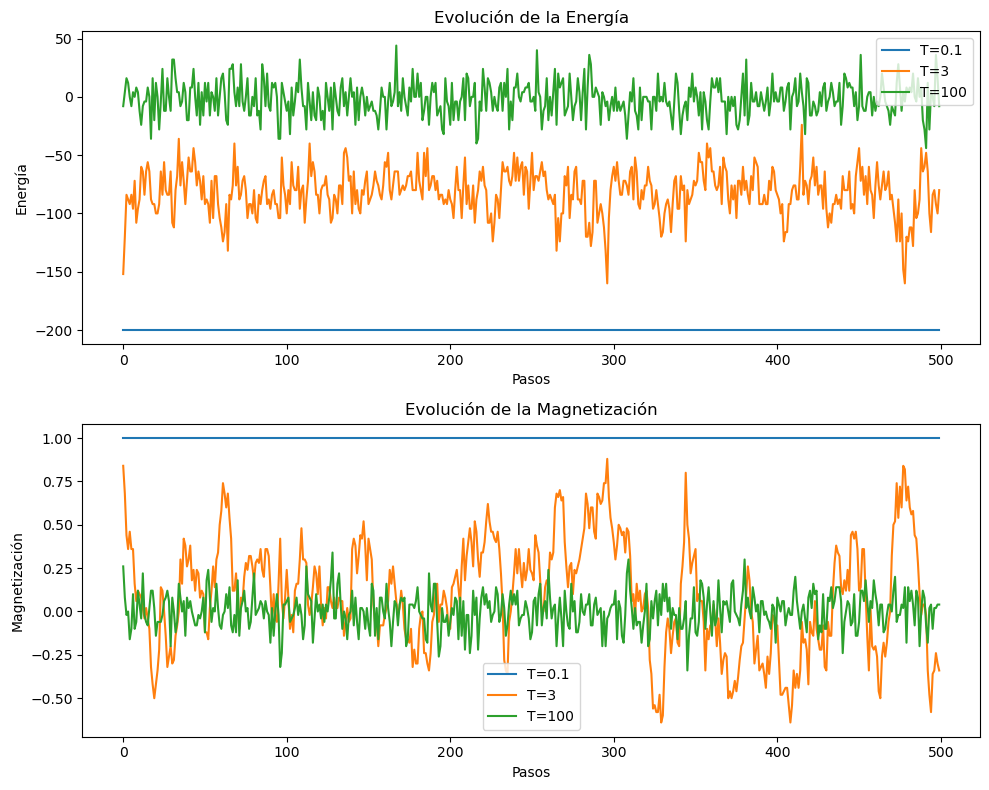

In [ ]:
# Parámetros de la simulación
L = 10          # Tamaño de la red
J = 1           # Interacción entre espines
H = 0           # Campo magnético externo
temperaturas = [0.1, 3, 100]  # Valores de temperatura
num_pasos = 500  # Número de pasos de Monte Carlo
TT = 2**13  # Tiempo de termalización

# Arrays para almacenar la energía y magnetización promedio en cada paso
energia_promedios = {T: [] for T in temperaturas}
magnetizacion_promedios = {T: [] for T in temperaturas}

# Simulación para cada temperatura
for T in temperaturas:
    beta = 1 / T
    config = np.ones((L, L), dtype=int)  # Arranque en frío
    # Arrays temporales para energía y magnetización
    energia_total = []
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar Metrópolis y calcular energía y magnetización
        config = metropolis(config, L, J, H, beta)
        energia_total.append(calcular_energia(config, L, J, H))
        magnetizacion_total.append(calcular_magnetizacion(config))

    # Almacenar las listas de energía y magnetización en el diccionario
    energia_promedios[T] = energia_total
    magnetizacion_promedios[T] = magnetizacion_total

# Gráficas de energía y magnetización en función del tiempo
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
for T in temperaturas:
    pasos = np.arange(num_pasos)
    axs[0].plot(pasos, energia_promedios[T], label=f'T={T}')
    axs[1].plot(pasos, magnetizacion_promedios[T], label=f'T={T}')

# Configurar las gráficas
axs[0].set_title("Evolución de la Energía")
axs[0].set_xlabel("Pasos")
axs[0].set_ylabel("Energía")
axs[0].legend()

axs[1].set_title("Evolución de la Magnetización")
axs[1].set_xlabel("Pasos")
axs[1].set_ylabel("Magnetización")
axs[1].legend()

plt.tight_layout()
plt.show()

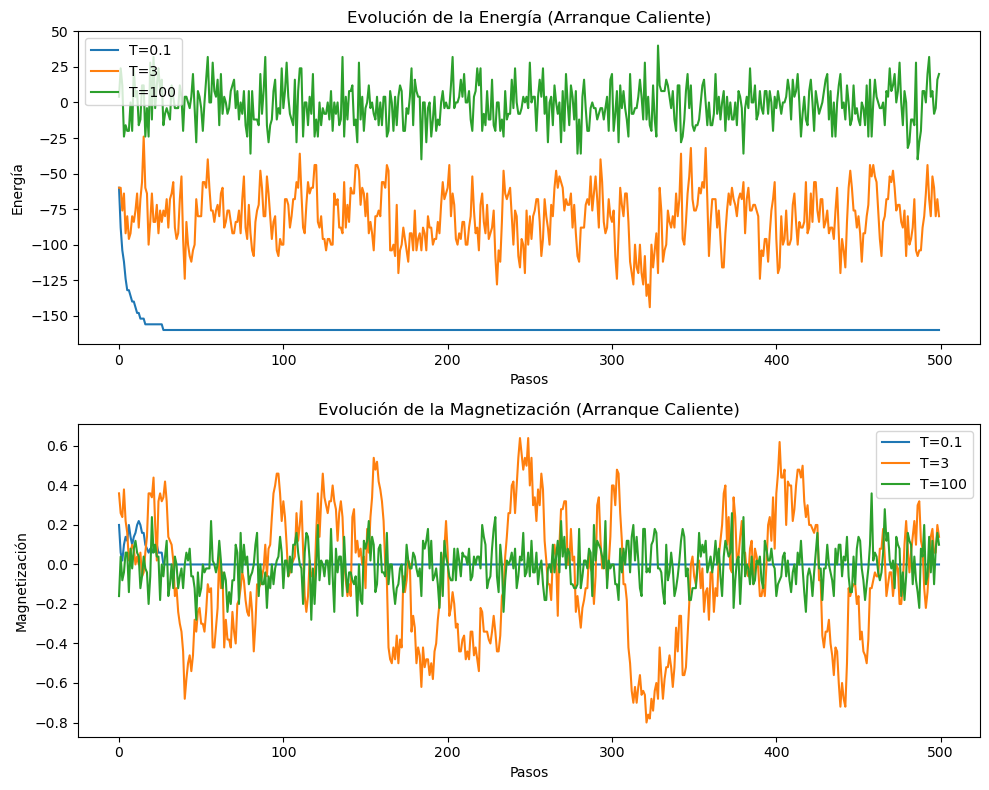

In [ ]:
# Parámetros de la simulación
L = 10          # Tamaño de la red
J = 1           # Interacción entre espines
H = 0           # Campo magnético externo
temperaturas = [0.1, 3, 100]  # Valores de temperatura
num_pasos = 500  # Número de pasos de Monte Carlo
TT = 2**13  # Tiempo de termalización

# Arrays para almacenar la energía y magnetización promedio en cada paso
energia_promedios = {T: [] for T in temperaturas}
magnetizacion_promedios = {T: [] for T in temperaturas}

# Simulación para cada temperatura
for T in temperaturas:
    beta = 1 / T
    # Arranque caliente: configuración inicial aleatoria de espines (-1 o +1)
    config = np.random.choice([-1, 1], size=(L, L))
    # Arrays temporales para energía y magnetización
    energia_total = []
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar Metrópolis y calcular energía y magnetización
        config = metropolis(config, L, J, H, beta)
        energia_total.append(calcular_energia(config, L, J, H))
        magnetizacion_total.append(calcular_magnetizacion(config))

    # Almacenar las listas de energía y magnetización en el diccionario
    energia_promedios[T] = energia_total
    magnetizacion_promedios[T] = magnetizacion_total

# Gráficas de energía y magnetización en función del tiempo
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
for T in temperaturas:
    pasos = np.arange(num_pasos)
    axs[0].plot(pasos, energia_promedios[T], label=f'T={T}')
    axs[1].plot(pasos, magnetizacion_promedios[T], label=f'T={T}')

# Configurar las gráficas
axs[0].set_title("Evolución de la Energía (Arranque Caliente)")
axs[0].set_xlabel("Pasos")
axs[0].set_ylabel("Energía")
axs[0].legend()

axs[1].set_title("Evolución de la Magnetización (Arranque Caliente)")
axs[1].set_xlabel("Pasos")
axs[1].set_ylabel("Magnetización")
axs[1].legend()

plt.tight_layout()
plt.show()


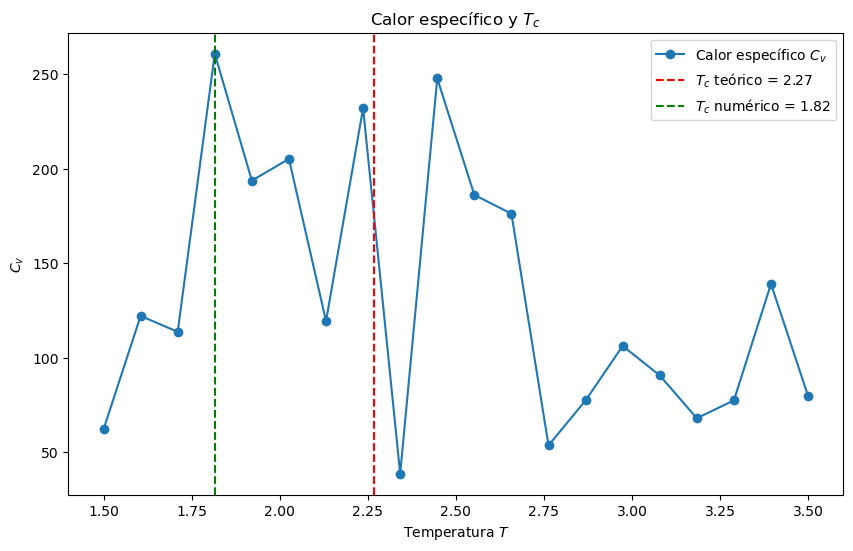

Tc teórico: 2.2692, Tc numérico: 1.8158, Error relativo: 19.98%


In [ ]:
# Parámetros globales
L = 20  # Tamaño de la red
J = 1  # Interacción
H = 0  # Campo magnético externo
k_B = 1  # Constante de Boltzmann

# Definimos este algotmo nuevo para optimizar el tiempo de computo
def metropolis(espines, L, J, H, beta):
    """Implementa un paso del algoritmo de Metrópolis."""
    i, j = np.random.randint(0, L, 2)  # Elegir espín aleatorio
    si = espines[i, j]
    vecinos = (
        espines[(i + 1) % L, j]
        + espines[(i - 1) % L, j]
        + espines[i, (j + 1) % L]
        + espines[i, (j - 1) % L]
    )
    dE = 2 * J * si * vecinos + 2 * H * si
    if dE <= 0 or np.random.rand() < np.exp(-beta * dE):
        espines[i, j] *= -1

# Parámetros de simulación
T_range = np.linspace(1.5, 3.5, 20)  # Temperaturas alrededor de Tc
beta_range = 1 / T_range
pasos_termalizacion = 10000
pasos_muestreo = 5000

# Resultados
energias = []
magnetizaciones = []
Cv = []
chi = []

# Inicialización de la red
for T, beta in zip(T_range, beta_range):
    espines = np.random.choice([-1, 1], size=(L, L))  # Configuración inicial aleatoria
    # Termalización
    for _ in range(pasos_termalizacion):
        metropolis(espines, L, J, H, beta)

    # Muestreo
    E_vals = []
    M_vals = []
    for _ in range(pasos_muestreo):
        metropolis(espines, L, J, H, beta)
        E_vals.append(calcular_energia(espines, L, J, H))
        M_vals.append(calcular_magnetizacion(espines))

    # Promedios y fluctuaciones
    E_avg = np.mean(E_vals)
    E2_avg = np.mean(np.square(E_vals))
    M_avg = np.mean(M_vals)
    M2_avg = np.mean(np.square(M_vals))

    Cv.append(beta**2 * (E2_avg - E_avg**2))
    chi.append(beta * (M2_avg - M_avg**2))
    energias.append(E_avg)
    magnetizaciones.append(M_avg)

# Comparación teórica y numérica
Tc_teorico = 2 * J / (k_B * np.log(np.sqrt(2) + 1))
Tc_numerico = T_range[np.argmax(Cv)]

# Resultados y gráficas
plt.figure(figsize=(10, 6))
plt.plot(T_range, Cv, label='Calor específico $C_v$', marker='o')
plt.axvline(Tc_teorico, color='r', linestyle='--', label=f'$T_c$ teórico = {Tc_teorico:.2f}')
plt.axvline(Tc_numerico, color='g', linestyle='--', label=f'$T_c$ numérico = {Tc_numerico:.2f}')
plt.xlabel('Temperatura $T$')
plt.ylabel('$C_v$')
plt.legend()
plt.title('Calor específico y $T_c$')
plt.show()

# Error relativo
error_relativo = abs((Tc_numerico - Tc_teorico) / Tc_teorico) * 100
print(f"Tc teórico: {Tc_teorico:.4f}, Tc numérico: {Tc_numerico:.4f}, Error relativo: {error_relativo:.2f}%")


# Se usa numba para que sea más rapido el computo total

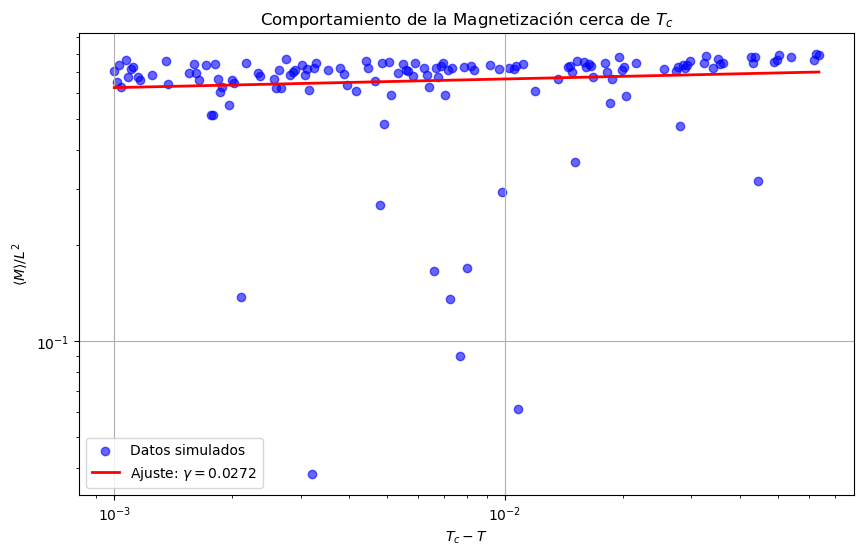

0.027211076757461535

In [ ]:
# Funciones optimizadas con Numba

@njit
def calcular_energia_numba(config, L, J, H):
    energia = 0.0
    for i in range(L):
        for j in range(L):
            derecha = config[i, (j + 1) % L]
            abajo = config[(i + 1) % L, j]
            energia -= J * config[i, j] * (derecha + abajo)
            energia -= H * config[i, j]
    return energia

@njit
def calcular_magnetizacion_numba(config):
    return np.sum(config)

@njit
def metropolis_numba(config, L, J, H, beta):
    for _ in range(L * L):  # L^2 actualizaciones por paso de Monte Carlo
        x = np.random.randint(0, L)
        y = np.random.randint(0, L)
        s = config[x, y]
        delta_E = 2 * J * s * (config[(x + 1) % L, y] + config[(x - 1) % L, y]
                               + config[x, (y + 1) % L] + config[x, (y - 1) % L]) + 2 * H * s
        if delta_E < 0 or np.random.rand() < np.exp(-beta * delta_E):
            config[x, y] = -s
    return config

# Función de ajuste
def magnetizacion_critica_fit(T_diferencia, a, gamma):
    return a * T_diferencia**gamma

# Parámetros para el inciso 2
L = 30  # Tamaño de la red
J = 1
H = 0
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
n_temperaturas = 500  # Número de temperaturas a simular
temperaturas = Tc - np.logspace(-3, 0, n_temperaturas)  # T = Tc - 10^{-3}n
beta_valores = 1 / temperaturas  # Valores de beta para las temperaturas
TT = 2**13  # Tiempo de termalización
num_pasos = 10000  # Pasos totales

# Arrays para almacenar los resultados
magnetizaciones_promedio = []

# Simulación para cada temperatura
config = np.ones((L, L), dtype=np.int8)  # Arranque en frío (todo +1)
for beta in beta_valores:
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar el algoritmo de Metrópolis
        config = metropolis_numba(config, L, J, H, beta)
        # Recolectar magnetización después de termalización
        if paso >= TT:
            magnetizacion_total.append(calcular_magnetizacion_numba(config) / (L * L))

    # Calcular la magnetización promedio en equilibrio
    if len(magnetizacion_total) > 0:
        magnetizaciones_promedio.append(np.mean(magnetizacion_total))
    else:
        magnetizaciones_promedio.append(0)  # En caso de no recolectar datos

# Ajuste de los datos para determinar gamma
T_diferencias = Tc - temperaturas
magnetizaciones_normalizadas = np.array(magnetizaciones_promedio)

# Filtrar temperaturas donde la magnetización es significativa (evitar valores cercanos a 0)
validos = magnetizaciones_normalizadas > 0
T_diferencias_validas = T_diferencias[validos]
magnetizaciones_validas = magnetizaciones_normalizadas[validos]

# Ajuste de curva
popt, pcov = curve_fit(magnetizacion_critica_fit, T_diferencias_validas, magnetizaciones_validas, p0=[1, 0.125])

# Resultados del ajuste
a_ajustado, gamma_ajustado = popt

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(T_diferencias_validas, magnetizaciones_validas, color='blue', label='Datos simulados', alpha=0.6)
plt.plot(T_diferencias_validas, magnetizacion_critica_fit(T_diferencias_validas, *popt),
         color='red', label=f'Ajuste: $\\gamma = {gamma_ajustado:.4f}$', linewidth=2)
plt.xlabel(r"$T_c - T$")
plt.ylabel(r"$\langle M \rangle / L^2$")
plt.title("Comportamiento de la Magnetización cerca de $T_c$")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

gamma_ajustado


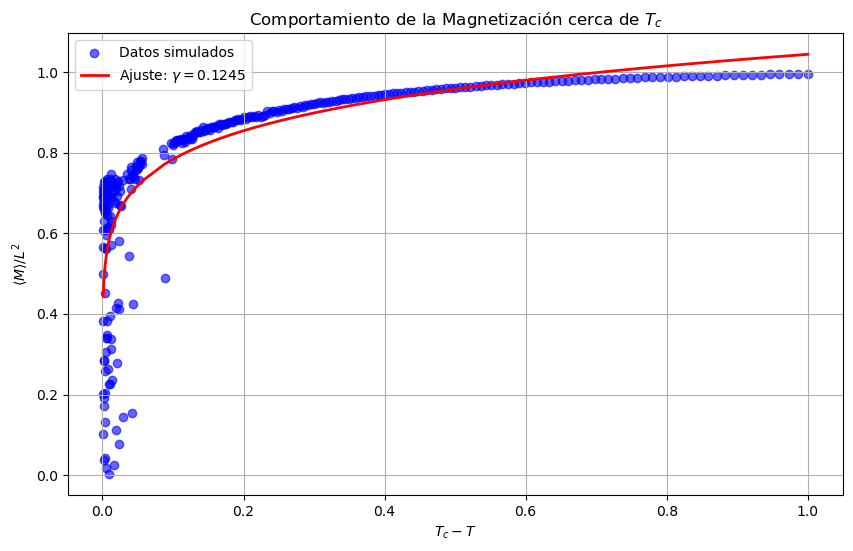

0.12451115024342707

In [ ]:
num_pasos = 15000

# Arrays para almacenar los resultados
magnetizaciones_promedio = []

# Simulación para cada temperatura
config = np.ones((L, L), dtype=np.int8)  # Arranque en frío (todo +1)
for beta in beta_valores:
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar el algoritmo de Metrópolis
        config = metropolis_numba(config, L, J, H, beta)
        # Recolectar magnetización después de termalización
        if paso >= TT:
            magnetizacion_total.append(calcular_magnetizacion_numba(config) / (L * L))

    # Calcular la magnetización promedio en equilibrio
    if len(magnetizacion_total) > 0:
        magnetizaciones_promedio.append(np.mean(magnetizacion_total))
    else:
        magnetizaciones_promedio.append(0)  # En caso de no recolectar datos

# Ajuste de los datos para determinar gamma
T_diferencias = Tc - temperaturas
magnetizaciones_normalizadas = np.array(magnetizaciones_promedio)

# Filtrar temperaturas donde la magnetización es significativa (evitar valores cercanos a 0)
validos = magnetizaciones_normalizadas > 0
T_diferencias_validas = T_diferencias[validos]
magnetizaciones_validas = magnetizaciones_normalizadas[validos]

# Ajuste de curva
popt, pcov = curve_fit(magnetizacion_critica_fit, T_diferencias_validas, magnetizaciones_validas, p0=[1, 0.125])

# Resultados del ajuste
a_ajustado, gamma_ajustado = popt

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(T_diferencias_validas, magnetizaciones_validas, color='blue', label='Datos simulados', alpha=0.6)
plt.plot(T_diferencias_validas, magnetizacion_critica_fit(T_diferencias_validas, *popt),
         color='red', label=f'Ajuste: $\\gamma = {gamma_ajustado:.4f}$', linewidth=2)
plt.xlabel(r"$T_c - T$")
plt.ylabel(r"$\langle M \rangle / L^2$")
plt.title("Comportamiento de la Magnetización cerca de $T_c$")
plt.legend()
plt.grid(True)

plt.show()

gamma_ajustado

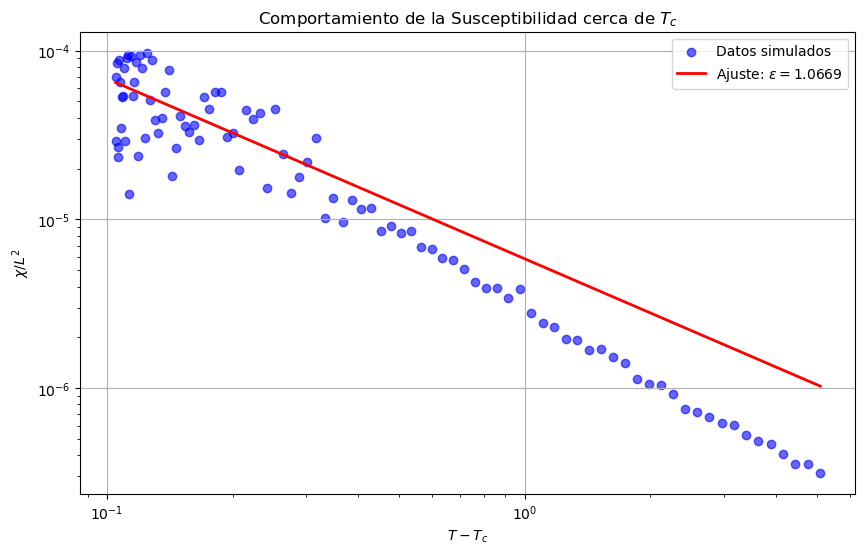

1.0669309385490904

In [ ]:
# Función para la susceptibilidad ajustada
def susceptibilidad_fit(T_diferencia, a, epsilon):
    return a * T_diferencia**-epsilon

# Parámetros para el inciso 3
L = 30  # Tamaño de la red
J = 1
H = 0
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
n_temperaturas = 100  # Número de temperaturas a simular
temperaturas = Tc + 0.1 + 5 * np.logspace(-3, 0, n_temperaturas)  # T > Tc
beta_valores = 1 / temperaturas  # Valores de beta para las temperaturas
TT = 2**13  # Tiempo de termalización
num_pasos = 10000  # Pasos totales

# Arrays para almacenar los resultados
susceptibilidades = []

# Simulación para cada temperatura
config = np.ones((L, L), dtype=np.int8)  # Arranque en frío (todo +1)
for beta in beta_valores:
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar el algoritmo de Metrópolis
        config = metropolis_numba(config, L, J, H, beta)
        # Recolectar magnetización después de termalización
        if paso >= TT:
            magnetizacion_total.append(calcular_magnetizacion_numba(config) / (L * L))

    # Calcular la susceptibilidad en equilibrio
    if len(magnetizacion_total) > 0:
        M_promedio = np.mean(magnetizacion_total)
        M_cuadrado_promedio = np.mean(np.array(magnetizacion_total)**2)
        chi = beta * (M_cuadrado_promedio - M_promedio**2) / (L**2)
        susceptibilidades.append(chi)
    else:
        susceptibilidades.append(0)  # En caso de no recolectar datos

# Ajuste de los datos para determinar epsilon
T_diferencias = temperaturas - Tc
susceptibilidades = np.array(susceptibilidades)

# Filtrar temperaturas donde la susceptibilidad es significativa (evitar valores cercanos a 0)
validos = susceptibilidades > 0
T_diferencias_validas = T_diferencias[validos]
susceptibilidades_validas = susceptibilidades[validos]

# Ajuste de curva
popt, pcov = curve_fit(susceptibilidad_fit, T_diferencias_validas, susceptibilidades_validas, p0=[1, 1.75])

# Resultados del ajuste
a_ajustado, epsilon_ajustado = popt

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(T_diferencias_validas, susceptibilidades_validas, color='blue', label='Datos simulados', alpha=0.6)
plt.plot(T_diferencias_validas, susceptibilidad_fit(T_diferencias_validas, *popt),
         color='red', label=f'Ajuste: $\\epsilon = {epsilon_ajustado:.4f}$', linewidth=2)
plt.xlabel(r"$T - T_c$")
plt.ylabel(r"$\chi / L^2$")
plt.title("Comportamiento de la Susceptibilidad cerca de $T_c$")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.show()

epsilon_ajustado


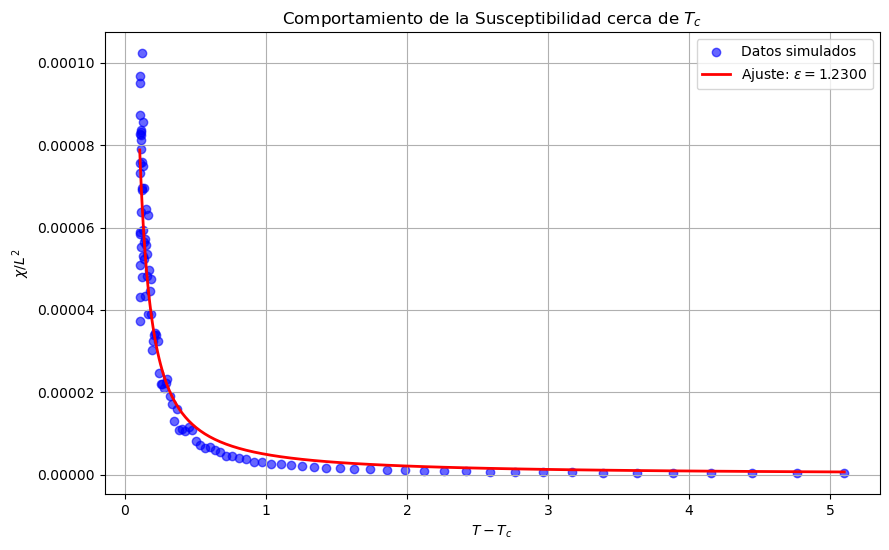

1.230007742292193

In [ ]:

# Parámetros para el inciso 3
L = 30  # Tamaño de la red
J = 1
H = 0
Tc = 2.269  # Temperatura crítica del modelo de Ising 2D
n_temperaturas = 100  # Número de temperaturas a simular
temperaturas = Tc + 0.1 + 5 * np.logspace(-3, 0, n_temperaturas)  # T > Tc
beta_valores = 1 / temperaturas  # Valores de beta para las temperaturas
TT = 2**13  # Tiempo de termalización
num_pasos = 15000  # Pasos totales

# Arrays para almacenar los resultados
susceptibilidades = []

# Simulación para cada temperatura
config = np.ones((L, L), dtype=np.int8)  # Arranque en frío (todo +1)
for beta in beta_valores:
    magnetizacion_total = []

    for paso in range(num_pasos):
        # Aplicar el algoritmo de Metrópolis
        config = metropolis_numba(config, L, J, H, beta)
        # Recolectar magnetización después de termalización
        if paso >= TT:
            magnetizacion_total.append(calcular_magnetizacion_numba(config) / (L * L))

    # Calcular la susceptibilidad en equilibrio
    if len(magnetizacion_total) > 0:
        M_promedio = np.mean(magnetizacion_total)
        M_cuadrado_promedio = np.mean(np.array(magnetizacion_total)**2)
        chi = beta * (M_cuadrado_promedio - M_promedio**2) / (L**2)
        susceptibilidades.append(chi)
    else:
        susceptibilidades.append(0)  # En caso de no recolectar datos

# Ajuste de los datos para determinar epsilon
T_diferencias = temperaturas - Tc
susceptibilidades = np.array(susceptibilidades)

# Filtrar temperaturas donde la susceptibilidad es significativa (evitar valores cercanos a 0)
validos = susceptibilidades > 0
T_diferencias_validas = T_diferencias[validos]
susceptibilidades_validas = susceptibilidades[validos]

# Ajuste de curva
popt, pcov = curve_fit(susceptibilidad_fit, T_diferencias_validas, susceptibilidades_validas, p0=[1, 1.75])

# Resultados del ajuste
a_ajustado, epsilon_ajustado = popt

# Gráfica de los resultados
plt.figure(figsize=(10, 6))
plt.scatter(T_diferencias_validas, susceptibilidades_validas, color='blue', label='Datos simulados', alpha=0.6)
plt.plot(T_diferencias_validas, susceptibilidad_fit(T_diferencias_validas, *popt),
         color='red', label=f'Ajuste: $\\epsilon = {epsilon_ajustado:.4f}$', linewidth=2)
plt.xlabel(r"$T - T_c$")
plt.ylabel(r"$\chi / L^2$")
plt.title("Comportamiento de la Susceptibilidad cerca de $T_c$")
plt.legend()
plt.grid(True)
plt.show()

epsilon_ajustado